In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Using TensorFlow backend.
C:\Users\zaina\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zaina\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zaina\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zaina\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
df = pd.read_csv('fake_news.csv')
df =df.reindex(np.random.permutation(df.index))
df.head()

,Unnamed: 0,title,text,label
36897,36897,FULL RAW VIDEO: Donald Trump Press Conference ...,Great press conference with Trump! He makes so...,FAKE
9750,9750,"Treasury, House panel getting 'very close' on ...",WASHINGTON (Reuters) - The U.S. Treasury Depar...,TRUE
27432,27432,Black And Brown People Accounted For 86.5 Per...,Black and brown people accounted for 86.5 perc...,FAKE
40949,40949,WOW! FOX REPORTER GOES OFF On SEIU Thug For Te...,Wow! @FoxBusiness @JeffFlock just WENT OFF on ...,FAKE
22895,22895,Lindsey Graham: Trump Should Be Treated With ...,We re wondering if Sen. Lindsey Graham (R) is ...,FAKE


In [4]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()

,title,text,label
36897,FULL RAW VIDEO: Donald Trump Press Conference ...,Great press conference with Trump! He makes so...,FAKE
9750,"Treasury, House panel getting 'very close' on ...",WASHINGTON (Reuters) - The U.S. Treasury Depar...,TRUE
27432,Black And Brown People Accounted For 86.5 Per...,Black and brown people accounted for 86.5 perc...,FAKE
40949,WOW! FOX REPORTER GOES OFF On SEIU Thug For Te...,Wow! @FoxBusiness @JeffFlock just WENT OFF on ...,FAKE
22895,Lindsey Graham: Trump Should Be Treated With ...,We re wondering if Sen. Lindsey Graham (R) is ...,FAKE


In [5]:
# checking if any missing values
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [6]:
df.head()

,title,text,label
36897,FULL RAW VIDEO: Donald Trump Press Conference ...,Great press conference with Trump! He makes so...,FAKE
9750,"Treasury, House panel getting 'very close' on ...",WASHINGTON (Reuters) - The U.S. Treasury Depar...,TRUE
27432,Black And Brown People Accounted For 86.5 Per...,Black and brown people accounted for 86.5 perc...,FAKE
40949,WOW! FOX REPORTER GOES OFF On SEIU Thug For Te...,Wow! @FoxBusiness @JeffFlock just WENT OFF on ...,FAKE
22895,Lindsey Graham: Trump Should Be Treated With ...,We re wondering if Sen. Lindsey Graham (R) is ...,FAKE


In [7]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

## feature engineering

In [8]:
## A. TOTAL NUMBER OF WORDS USED 
df['nb_words'] = df.title.apply(lambda x: len(x.split()))

## B. TOTAL NUMBER OF UNIQUE WORDS USED
df['nb_unique_words'] = df.title.apply(lambda x: len(set(x.split())))

## C. TOTAL NUMBER OF CHARACTERS USED
df['nb_char'] = df.title.apply(lambda x: len(x))

## D. TOTAL SPECIAL CHARACTERS USED
df["nb_special"] = df.apply(lambda p: sum( not q.isalpha() for q in p["title"] ), axis=1)

## D. TOTAL NUMBER OF PUNCTUATION USED
def punct(text):
    return(len([w for w in text.split() if w in list(string.punctuation)]))
df['nb_punct'] = df.title.apply(lambda x: punct(x))

## E. TOTAL NUMBER OF STOPWORDS USED
stopword = stopwords.words('english')
def stop(text):
    return(len([w for w in text.split() if w in stopword]))
df['nb_stopwords'] = df.title.apply(lambda x: stop(x))

## F. TOTAL NUMBER OF TITLE WORDS USED
def title(text):
    return(len([w for w in text.split() if w.istitle()]))
df['nb_title_case'] = df.title.apply(lambda x: title(x))

## G. TOTAL NUMBER OF UPPERCASE WORDS USED
def upper(text):
    return(len([w for w in text.split() if w.isupper()]))
df['nb_title_case'] = df.title.apply(lambda x: upper(x))

## H. NUMBER OF MOST FREQUENT TERMS
token = nltk.word_tokenize(''.join(df.title))
frequent = nltk.FreqDist(token)
frequent.most_common(15)


[(':', 13638),
 ('’', 13531),
 ('Trump', 10790),
 (',', 9779),
 ('to', 8950),
 ('To', 7564),
 ('s', 5881),
 ('”', 5470),
 ('VIDEO', 5329),
 ('[', 5239),
 (']', 5238),
 ('in', 5033),
 ('“', 5028),
 ('The', 4567),
 ('(', 4231)]

In [9]:
## REMOVING PUNCTUATION AND STOPWORDS FROM MOST FREQUENT WORDS
for sym in string.punctuation:
    del frequent[sym]
for word in stopword:
    del frequent[word]
frequent.most_common(15)

[('’', 13531),
 ('Trump', 10790),
 ('To', 7564),
 ('”', 5470),
 ('VIDEO', 5329),
 ('“', 5028),
 ('The', 4567),
 ("'s", 4156),
 ('For', 3966),
 ('In', 3566),
 ('Of', 3441),
 ('‘', 3438),
 ('A', 3082),
 ('Video', 2991),
 ('U.S.', 2938)]

In [10]:
## I. NUMBER OF WORDS CONTAIN OUT OF MOST COMMON 100 WORDS 
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words]))
df['nb_freq_words'] = df.title.apply(lambda x: freq(x))

In [11]:
df.head()

,title,text,label,nb_words,nb_unique_words,nb_char,nb_special,nb_punct,nb_stopwords,nb_title_case,nb_freq_words
36897,FULL RAW VIDEO: Donald Trump Press Conference ...,Great press conference with Trump! He makes so...,FAKE,15,15,95,16,0,3,3,2
9750,"Treasury, House panel getting 'very close' on ...",WASHINGTON (Reuters) - The U.S. Treasury Depar...,TRUE,11,11,67,13,0,1,0,2
27432,Black And Brown People Accounted For 86.5 Per...,Black and brown people accounted for 86.5 perc...,FAKE,12,12,76,16,0,0,1,4
40949,WOW! FOX REPORTER GOES OFF On SEIU Thug For Te...,Wow! @FoxBusiness @JeffFlock just WENT OFF on ...,FAKE,18,18,104,22,0,0,6,5
22895,Lindsey Graham: Trump Should Be Treated With ...,We re wondering if Sen. Lindsey Graham (R) is ...,FAKE,13,13,85,14,0,0,0,6


In [12]:
## AVERAGE OF FREQ TERMS WITH TOTAL WORDS USED
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words])/len(text.split()))
df['avg_freq_word']= df.title.apply(lambda x: freq(x))

In [13]:
df.head()

,title,text,label,nb_words,nb_unique_words,nb_char,nb_special,nb_punct,nb_stopwords,nb_title_case,nb_freq_words,avg_freq_word
36897,FULL RAW VIDEO: Donald Trump Press Conference ...,Great press conference with Trump! He makes so...,FAKE,15,15,95,16,0,3,3,2,0.133333
9750,"Treasury, House panel getting 'very close' on ...",WASHINGTON (Reuters) - The U.S. Treasury Depar...,TRUE,11,11,67,13,0,1,0,2,0.181818
27432,Black And Brown People Accounted For 86.5 Per...,Black and brown people accounted for 86.5 perc...,FAKE,12,12,76,16,0,0,1,4,0.333333
40949,WOW! FOX REPORTER GOES OFF On SEIU Thug For Te...,Wow! @FoxBusiness @JeffFlock just WENT OFF on ...,FAKE,18,18,104,22,0,0,6,5,0.277778
22895,Lindsey Graham: Trump Should Be Treated With ...,We re wondering if Sen. Lindsey Graham (R) is ...,FAKE,13,13,85,14,0,0,0,6,0.461538


## exploratory Data Analysis

C:\Users\zaina\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

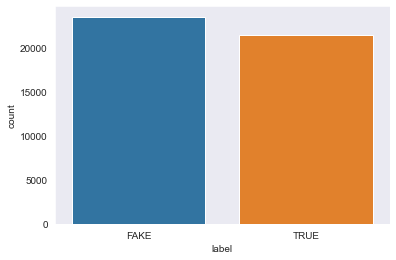

In [14]:
sns.set_style("dark")
sns.countplot(df.label)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
df_fake = df[df['label']=='FAKE']
df_true = df[df['label']=='TRUE']

<AxesSubplot:ylabel='Frequency'>

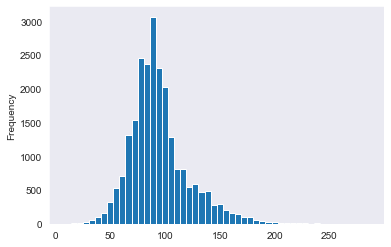

In [17]:
# plotting frequency of number of characters for fake data
df_fake['nb_char'].plot(bins=50, kind='hist')

In [18]:
df_fake['nb_char'].describe()

count    23481.000000
mean        94.198032
std         27.184433
min          8.000000
25%         77.000000
50%         90.000000
75%        105.000000
max        286.000000
Name: nb_char, dtype: float64

<AxesSubplot:ylabel='Frequency'>

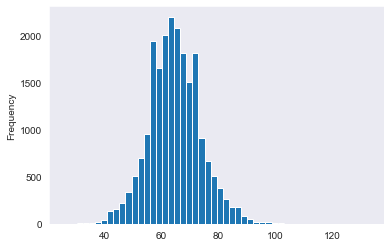

In [19]:
# plotting frequency of number of characters for true data
df_true['nb_char'].plot(bins=50, kind='hist')

In [20]:
df_true['nb_char'].describe()

count    21417.000000
mean        64.667881
std          9.168999
min         26.000000
25%         59.000000
50%         64.000000
75%         70.000000
max        133.000000
Name: nb_char, dtype: float64

As we can see, from above analysis average number of characters in a sentence in real news is around 64 while in case of fake news it is around 94 which is but obvious because fake news generally use superflous language with more characters to grab the attention

<AxesSubplot:ylabel='Frequency'>

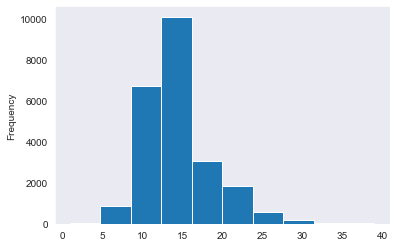

In [21]:
df_fake['nb_unique_words'].plot(bins=10, kind='hist')

In [22]:
df_fake['nb_unique_words'].describe()

count    23481.000000
mean        14.490609
std          4.129960
min          1.000000
25%         12.000000
50%         14.000000
75%         16.000000
max         39.000000
Name: nb_unique_words, dtype: float64

<AxesSubplot:ylabel='Frequency'>

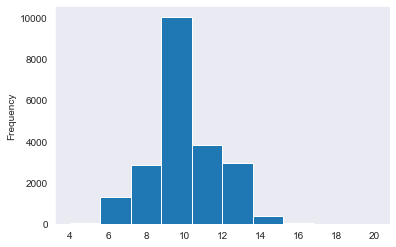

In [23]:
df_true['nb_unique_words'].plot(bins=10, kind='hist')

In [24]:
df_true['nb_unique_words'].describe()

count    21417.000000
mean         9.876827
std          1.656130
min          4.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         20.000000
Name: nb_unique_words, dtype: float64

### Observation:
As we can see average number of unique words in real headlines is relatively less in comparison to fake news

C:\Users\zaina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


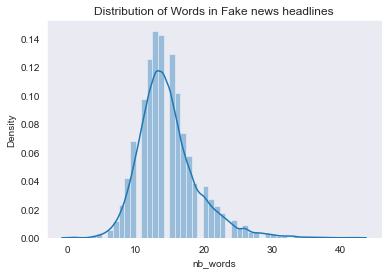

In [25]:
# distribution of words in fake Headline
sns.distplot(df_fake['nb_words'])
plt.title("Distribution of Words in Fake news headlines")
plt.show()

C:\Users\zaina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


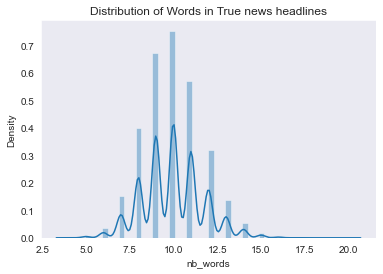

In [26]:
# distribution of words in Real news Headline
sns.distplot(df_true['nb_words'])
plt.title("Distribution of Words in True news headlines")
plt.show()

C:\Users\zaina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


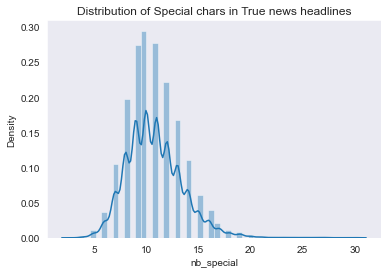

In [27]:
# distribution of  special characters in Real news Headline
sns.distplot(df_true['nb_special'])
plt.title("Distribution of Special chars in True news headlines")
plt.show()

C:\Users\zaina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


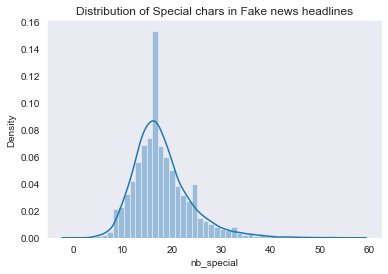

In [28]:
# distribution of  special characters in Fake news Headline
sns.distplot(df_fake['nb_special'])
plt.title("Distribution of Special chars in Fake news headlines")
plt.show()

### Observation:
As we can see there are more special characters in fake news than real news because real news is generally to the point no superflous words or less use of special characters 

In [29]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['title']=df['title'].apply(remove_stopwords)

## Plotting Wordcloud

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_fake.title))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (20,20)) # Text that is True News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df_true.title))
plt.imshow(wc , interpolation = 'bilinear')